기존에 하려던 MTCNN+FaceNet 방식은 verification 방식이 아닌 것 같음.
미리 class들을 만들어주는 방식
https://jkisaaclee.kro.kr/keras/facenet/deep%20learning/computer%20vision/2019/10/01/how_to_develop_a_face_recognition_system_using_facenet_in_keras_ko/

# Deepface 써보자

In [ ]:
pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 829.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=5de8775f3558619f60f442db000ea62f0ad8ae247e528ef80ffe05af5fdbf12d
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


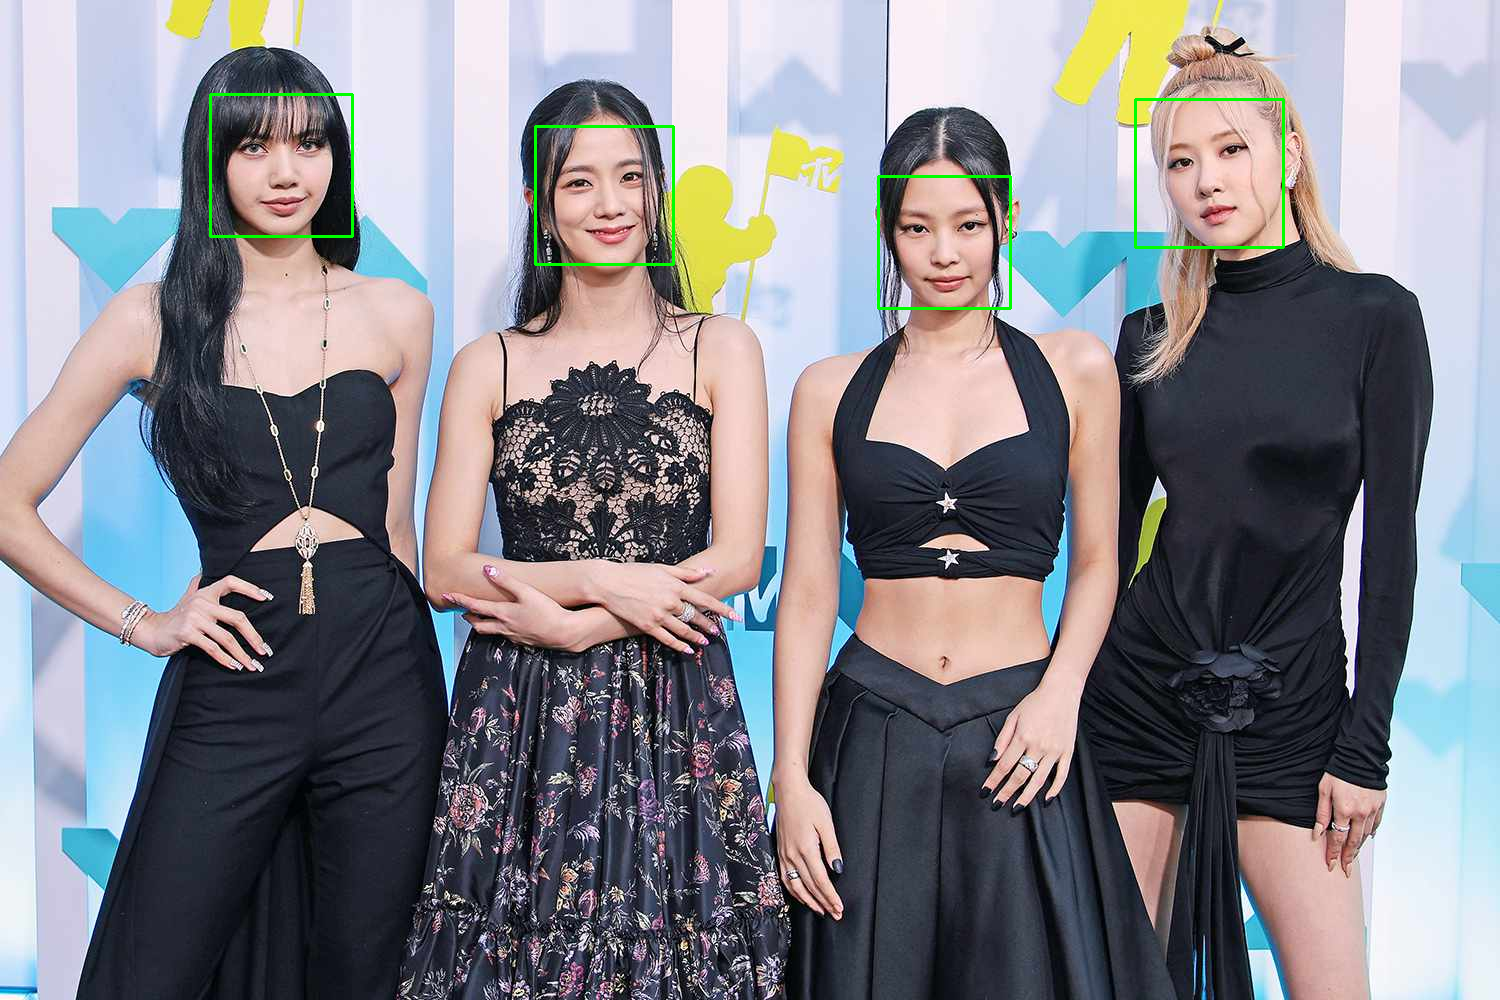

-1

In [ ]:
# Importing OpenCV package
import cv2
from google.colab.patches import cv2_imshow

# Reading the image
img = cv2.imread('/content/gdrive/MyDrive/야이콘_NAMAN/Blackpink-2023-members-01-9d67ffe25a474456b4be77adedb057b0.jpg')

# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
haar_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/야이콘_NAMAN/haarcascade_frontalface_default.xml')

# Applying the face detection method on the grayscale image
faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 9)

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(img)


cv2.waitKey(0)

In [ ]:
# Install packages
!pip install mtcnn
!pip install opencv-contrib-python

In [ ]:
import mtcnn
print(mtcnn.__version__)

0.1.0


In [ ]:
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

detector = MTCNN()
img = plt.imread('/content/gdrive/MyDrive/야이콘_NAMAN/Blackpink-2023-members-01-9d67ffe25a474456b4be77adedb057b0.jpg')
faces = detector.detect_faces(img)
faces

1/1 [==============================] - 1s 924ms/step


[{'box': [547, 118, 107, 155],
  'confidence': 0.9999603629112244,
  'keypoints': {'left_eye': (579, 183),
   'right_eye': (629, 177),
   'nose': (614, 212),
   'mouth_left': (585, 231),
   'mouth_right': (634, 225)}},
 {'box': [225, 95, 111, 139],
  'confidence': 0.9998044967651367,
  'keypoints': {'left_eye': (253, 145),
   'right_eye': (307, 143),
   'nose': (285, 177),
   'mouth_left': (260, 199),
   'mouth_right': (307, 195)}},
 {'box': [896, 167, 99, 143],
  'confidence': 0.9997973442077637,
  'keypoints': {'left_eye': (917, 228),
   'right_eye': (967, 226),
   'nose': (943, 259),
   'mouth_left': (923, 279),
   'mouth_right': (971, 276)}},
 {'box': [1159, 97, 116, 151],
  'confidence': 0.9995395541191101,
  'keypoints': {'left_eye': (1183, 163),
   'right_eye': (1231, 149),
   'nose': (1205, 186),
   'mouth_left': (1199, 218),
   'mouth_right': (1238, 208)}}]

In [ ]:
import copy

# Make a deep copy of the original faces list
faces_copy = copy.deepcopy(faces)

# Specify the expansion size (in pixels)
expansion_size = 20

# Modify the faces_copy list with expanded box information
for face_info in faces_copy:
    box = face_info['box']
    x, y, width, height = box

    # Expand the box in all directions
    expanded_box = [
        max(0, x - expansion_size),   # Ensure x is not negative
        max(0, y - expansion_size),   # Ensure y is not negative
        width + 2 * expansion_size,
        height + 2 * expansion_size
    ]

    # Update the 'box' key in the original faces_copy list
    face_info['box'] = expanded_box

# Print the modified faces_copy list
print(faces_copy)

[{'box': [527, 98, 147, 195], 'confidence': 0.9999603629112244, 'keypoints': {'left_eye': (579, 183), 'right_eye': (629, 177), 'nose': (614, 212), 'mouth_left': (585, 231), 'mouth_right': (634, 225)}}, {'box': [205, 75, 151, 179], 'confidence': 0.9998044967651367, 'keypoints': {'left_eye': (253, 145), 'right_eye': (307, 143), 'nose': (285, 177), 'mouth_left': (260, 199), 'mouth_right': (307, 195)}}, {'box': [876, 147, 139, 183], 'confidence': 0.9997973442077637, 'keypoints': {'left_eye': (917, 228), 'right_eye': (967, 226), 'nose': (943, 259), 'mouth_left': (923, 279), 'mouth_right': (971, 276)}}, {'box': [1139, 77, 156, 191], 'confidence': 0.9995395541191101, 'keypoints': {'left_eye': (1183, 163), 'right_eye': (1231, 149), 'nose': (1205, 186), 'mouth_left': (1199, 218), 'mouth_right': (1238, 208)}}]


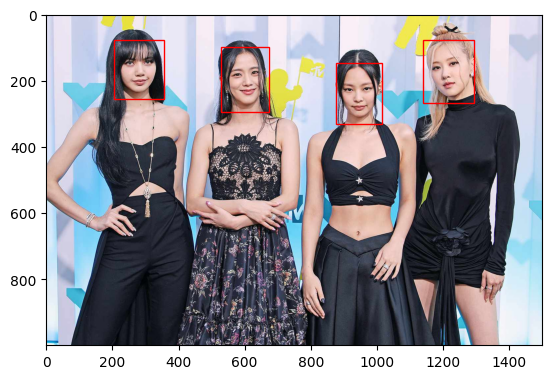

In [ ]:
from google.colab.patches import cv2_imshow
from matplotlib import patches
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

for face in faces_copy:
    x,y,w,h = face['box']

    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

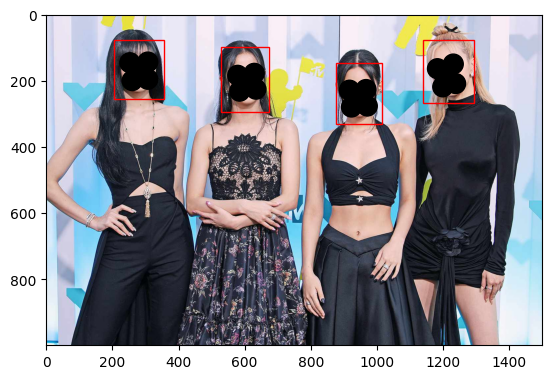

In [ ]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

for face in faces_copy:
    x,y,w,h = face['box']

    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # draw the dots
    for key, value in face['keypoints'].items():
        # create and draw dot
        dot = patches.Circle(value, radius=30, color='black')
        ax.add_patch(dot)

plt.show()

In [ ]:
# draw each face separately
def draw_faces(img, result_list):
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        # plot face
        plt.imshow(img[y1:y2, x1:x2])
    # show the plot
    plt.show()

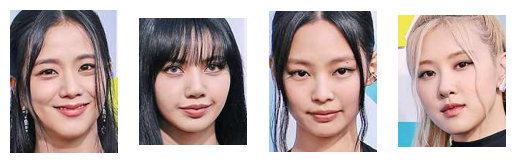

In [ ]:
draw_faces(img, faces_copy)

In [ ]:
print(faces)

[{'box': [547, 118, 107, 155], 'confidence': 0.9999603629112244, 'keypoints': {'left_eye': (579, 183), 'right_eye': (629, 177), 'nose': (614, 212), 'mouth_left': (585, 231), 'mouth_right': (634, 225)}}, {'box': [225, 95, 111, 139], 'confidence': 0.9998044967651367, 'keypoints': {'left_eye': (253, 145), 'right_eye': (307, 143), 'nose': (285, 177), 'mouth_left': (260, 199), 'mouth_right': (307, 195)}}, {'box': [896, 167, 99, 143], 'confidence': 0.9997973442077637, 'keypoints': {'left_eye': (917, 228), 'right_eye': (967, 226), 'nose': (943, 259), 'mouth_left': (923, 279), 'mouth_right': (971, 276)}}, {'box': [1159, 97, 116, 151], 'confidence': 0.9995395541191101, 'keypoints': {'left_eye': (1183, 163), 'right_eye': (1231, 149), 'nose': (1205, 186), 'mouth_left': (1199, 218), 'mouth_right': (1238, 208)}}]


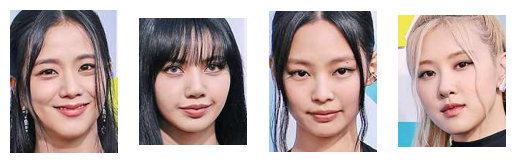

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def save_faces(img, result_list, output_folder):
    # Check if the output folder exists, if not, create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Save each face as a separate image
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face image
        face_image = img[y1:y2, x1:x2]

        # Save the face image to a file
        output_path = os.path.join(output_folder, f"face_{i+1}.jpg")
        cv2.imwrite(output_path, cv2.cvtColor(face_image, cv2.COLOR_RGB2BGR))

# Example usage
output_folder = "/content/gdrive/MyDrive/야이콘_NAMAN"
draw_faces(img, faces_copy)
save_faces(img, faces_copy, output_folder)

# Verification

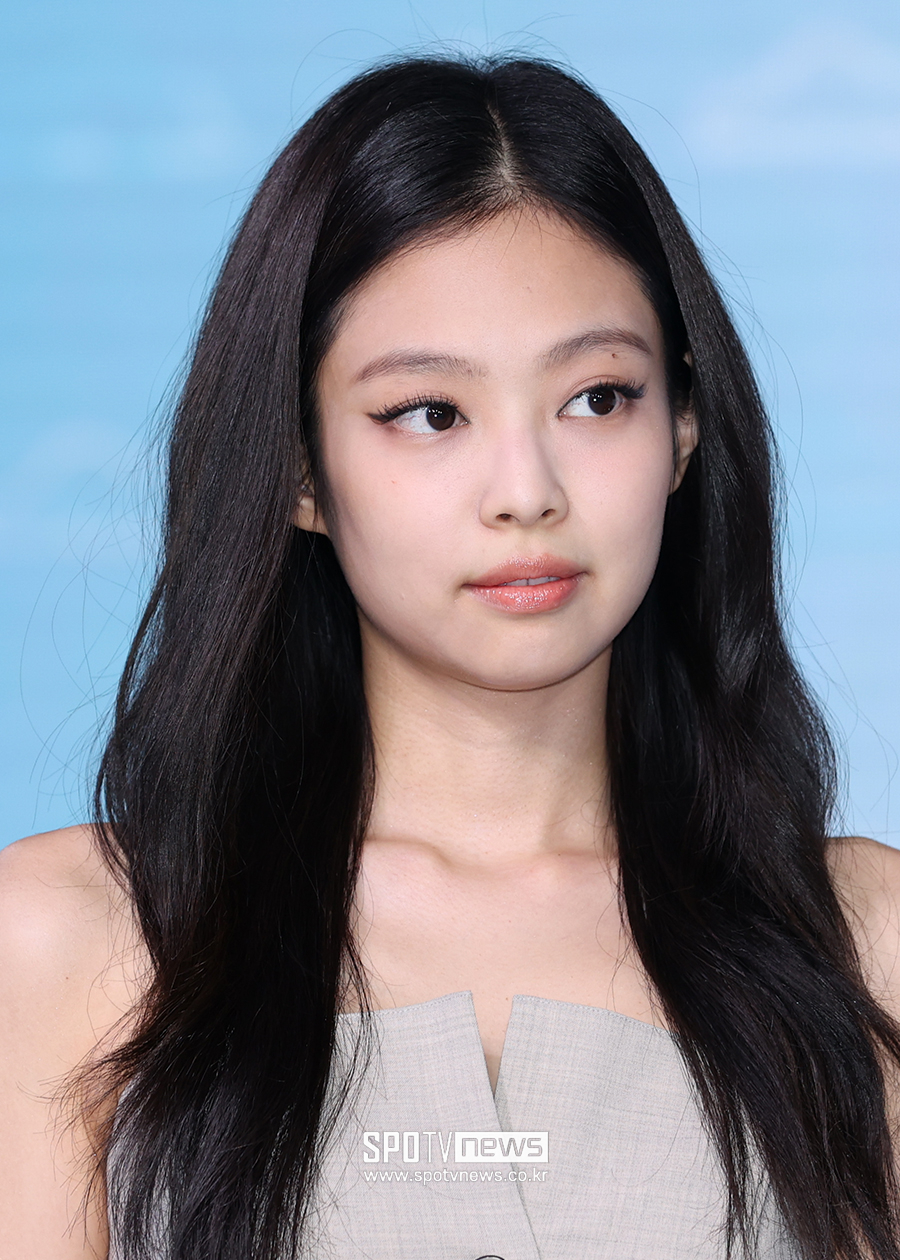

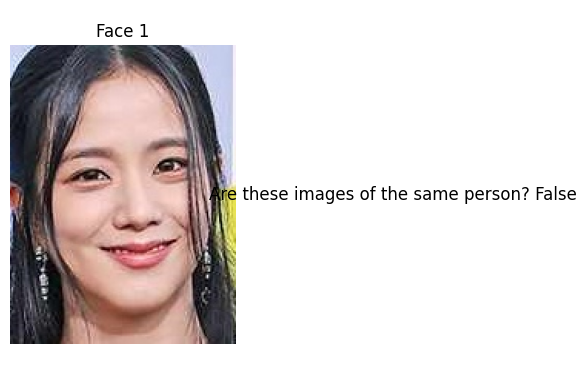

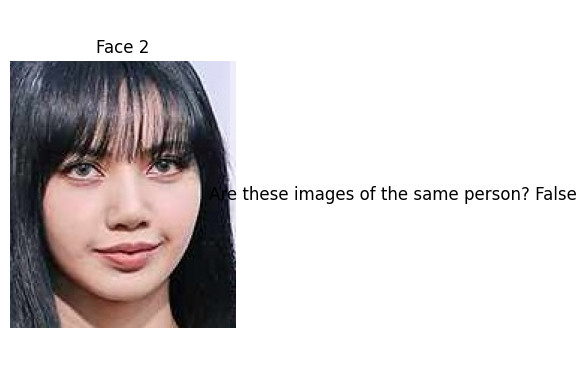

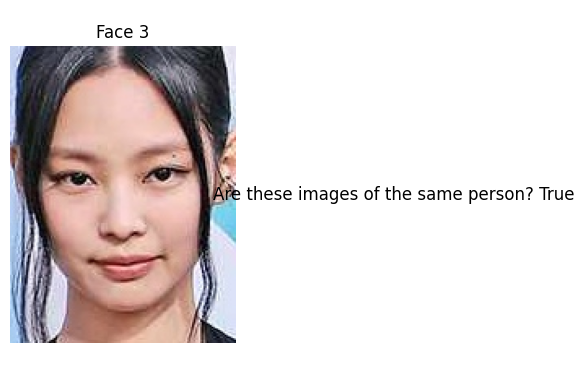

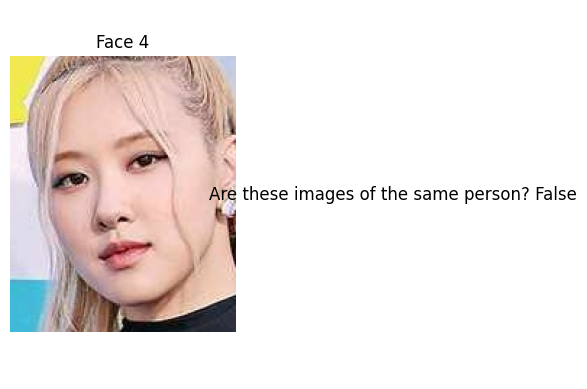

3


In [ ]:
from deepface import DeepFace
import cv2
import os
import matplotlib.pyplot as plt

detected_face = 0  # Declare as a global variable

def compare_faces(img1, img2, model_name="Facenet", enforce_detection=True):
    # Face verification
    verification = DeepFace.verify(img1, img2, model_name=model_name, enforce_detection=enforce_detection)

    return verification["verified"]

def draw_and_compare_faces(img_folder, sample_img_path, model_name="Facenet", enforce_detection=True):
    global detected_face  # Declare as a global variable

    # Load the sample image
    sample_img = cv2.imread(sample_img_path)

    # Iterate through face images in the folder
    for i in range(1, len(faces)+1):  # Assuming face images are named face_1.jpg, face_2.jpg, ..., face_10.jpg
        face_img_path = os.path.join(img_folder, f"face_{i}.jpg")

        # Check if the face image file exists
        if os.path.isfile(face_img_path):
            face_img = cv2.imread(face_img_path)

            # Display the face image
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f"Face {i}")

            try:
                # Compare the face with the sample image
                is_same_person = compare_faces(face_img, sample_img, model_name=model_name, enforce_detection=enforce_detection)

                if is_same_person:
                    detected_face = i

                # Display the result
                plt.subplot(1, 2, 2)
                plt.text(0.5, 0.5, f"Are these images of the same person? {is_same_person}", horizontalalignment='center', verticalalignment='center', fontsize=12)
                plt.axis('off')

            except ValueError as e:
                # Handle face detection failure
                plt.subplot(1, 2, 2)
                plt.text(0.5, 0.5, "Face detection failed", horizontalalignment='center', verticalalignment='center', fontsize=12)
                plt.axis('off')

            # Show the plot
            plt.show()

# Example usage
img_folder = "/content/gdrive/MyDrive/야이콘_NAMAN"
sample_img_path = "/content/gdrive/MyDrive/야이콘_NAMAN/jenny1.jpg"

# Reading the image
sample = cv2.imread('/content/gdrive/MyDrive/야이콘_NAMAN/jenny1.jpg')
cv2_imshow(sample)

draw_and_compare_faces(img_folder, sample_img_path)

print(detected_face)

In [ ]:
print(faces_copy[detected_face])

{'box': [1139, 77, 156, 191], 'confidence': 0.9995395541191101, 'keypoints': {'left_eye': (1183, 163), 'right_eye': (1231, 149), 'nose': (1205, 186), 'mouth_left': (1199, 218), 'mouth_right': (1238, 208)}}


{'box': [1139, 77, 156, 191], 'confidence': 0.9995395541191101, 'keypoints': {'left_eye': (1183, 163), 'right_eye': (1231, 149), 'nose': (1205, 186), 'mouth_left': (1199, 218), 'mouth_right': (1238, 208)}}


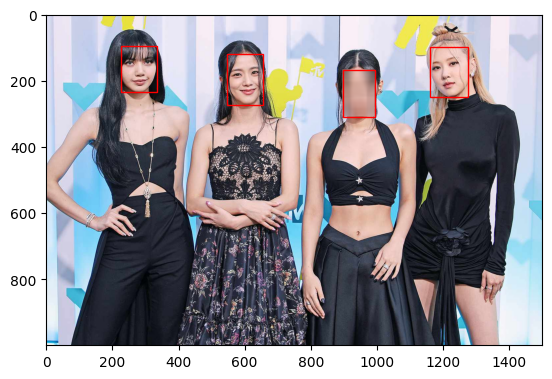

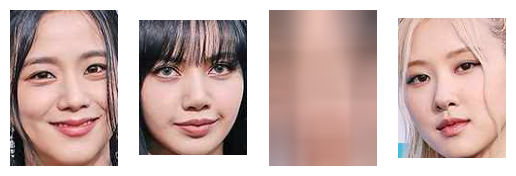

In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches


img = plt.imread('/content/gdrive/MyDrive/야이콘_NAMAN/Blackpink-2023-members-01-9d67ffe25a474456b4be77adedb057b0.jpg')


# 이미지 복사
img_copy = img.copy()

# Create figure and axes
fig, ax = plt.subplots()
print(faces_copy[detected_face])

for i, face in enumerate(faces):
    x, y, w, h = face['box']



























    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    if i == detected_face-1:
        roi = img_copy[y:y+h, x:x+w]
        roi = cv2.blur(roi, (50, 50))
        # impose this blurred image on the original image to get the final image
        img_copy[y:y+h, x:x+w] = roi

# Display the image
ax.imshow(img_copy)

plt.show()

draw_faces(img_copy, faces)

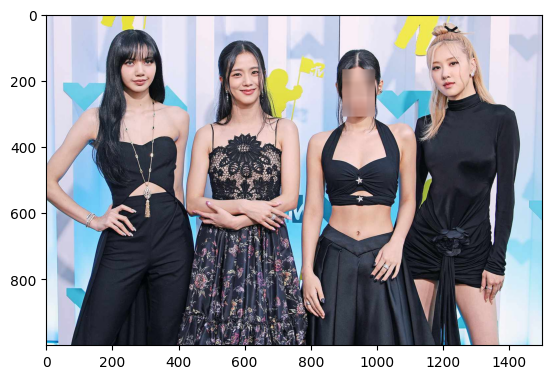

In [ ]:
plt.imshow(img_copy)